In [65]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

from neuropacks import PVC11

%matplotlib inline

In [2]:
data_path = '/Users/psachdeva/data/pvc11/data/spikes_gratings/data_monkey1_gratings.mat'

In [3]:
pvc = PVC11(data_path=data_path)
Y = pvc.get_response_matrix(transform=None)

In [7]:
lasso_results = h5py.File('fits/pvc11/monkey1.h5', 'r')
poisson_results = h5py.File('fits/pvc11/poisson.h5', 'r')

In [20]:
lasso_coefs = np.median(lasso_results['UoI_Lasso_R2/coupling_coefs'][:], axis=0)
poisson_coefs = np.median(poisson_results['pvc11/coupling_coefs'][:], axis=0)

In [21]:
n_neurons = lasso_coefs.shape[1]
sr_lasso = np.count_nonzero(lasso_coefs, axis=1) / n_neurons
sr_poisson = np.count_nonzero(poisson_coefs, axis=1) / n_neurons

In [37]:
min_overlap = np.zeros(n_neurons)
max_overlap = np.zeros(n_neurons)

for neuron in range(n_neurons):
    lasso = lasso_coefs[neuron]
    poisson = poisson_coefs[neuron]
    overlap_profile = (lasso * poisson) != 0
    minimum = min(np.count_nonzero(lasso), np.count_nonzero(poisson))
    maximum = max(np.count_nonzero(lasso), np.count_nonzero(poisson))
    if minimum == 0:
        min_overlap[neuron] = 1
    else:
        min_overlap[neuron] = np.count_nonzero(overlap_profile) / minimum
        
    max_overlap[neuron] = np.count_nonzero(overlap_profile) / maximum

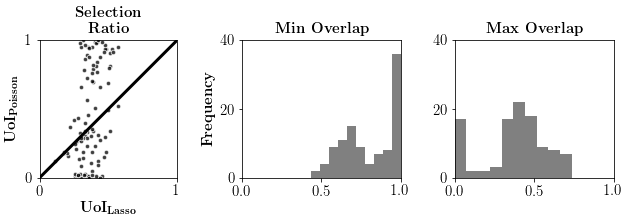

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3.))

axes[0].scatter(sr_lasso, sr_poisson, s=20, color='k', alpha=0.75, edgecolor='white')
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].plot([0, 1], [0, 1], color='k', linewidth=3)
axes[0].set_xlabel(r'\textbf{UoI}$_{\textbf{Lasso}}$', fontsize=15)
axes[0].set_ylabel(r'\textbf{UoI}$_{\textbf{Poisson}}$', fontsize=15)
axes[0].set_title(r'\textbf{Selection}' '\n' r'\textbf{Ratio}', fontsize=15)
axes[0].set_aspect('equal')
axes[0].tick_params(labelsize=15)

axes[1].hist(min_overlap, color='gray')
axes[1].set_xlim([0, 1])
axes[1].set_xticks([0, 0.5, 1])
axes[1].tick_params(labelsize=15)
axes[1].set_ylim([0, 40])
axes[1].set_yticks([0, 20, 40])
axes[1].set_ylabel(r'\textbf{Frequency}', fontsize=15)
axes[1].set_title(r'\textbf{Min Overlap}', fontsize=15)

axes[2].hist(max_overlap, color='gray')
axes[2].set_xlim([0, 1])
axes[2].set_xticks([0, 0.5, 1])
axes[2].tick_params(labelsize=15)
axes[2].set_ylim([0, 40])
axes[2].set_yticks([0, 20, 40])
axes[2].set_title(r'\textbf{Max Overlap}', fontsize=15)


plt.tight_layout()
plt.savefig('poisson_lasso.pdf', bbox_inches='tight')